# Algoritmos de Inteligencia Artificial con Redes Neuronales Artificiales #
<img align="left" src="home.jpg" style="width: 400px"/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>

"Estructura de los centros nerviosos de las aves" dibujo de Ramón y Cajal, obtenido de [wikipedia](https://en.wikipedia.org/wiki/Santiago_Ram%C3%B3n_y_Cajal#/media/File:CajalCerebellum.jpg)

---
### Taller impartido en el Instituto Tecnológico Superior del sur de Guanajuato en el 2018 ###

Únete a la conversación en el subredit [r/algoritmica](https://reddit.com/r/algoritmica)

---
### Cómo obtener los materiales del curso ###
1. Crea una cuenta en [github](https://github.com) 
2. Inicia sesión en [juliabox](https://v1.juliabox.com) usando tu cuenta de github
3. En la consola de juliabox escribe el siguiente comando:
```
git clone https://github.com/iranroman/algoritmica_ejercicios.git
```
4. (opcional) crea una cuenta en [reddit](https://reddit.com/r/algoritmica) y continúa la discusión fuera del aula

Así obtendrás una versión en linea del lenguaje de programación Julia y los ejercicios que estudiaremos en este taller. 



---

# Parte 1.1: Características de Datos #

Los objetos del mundo real pueden ser descritos por sus características. Existen un número infinito de características asociadas con un objeto específico. Sin embargo, unas de estas características resultan ser más importantes al diferenciar un objeto de otro. 

Por ejemplo, supongamos que nos interesa diferenciar tres tipos de flores por especie. Esto le interesó a [Ronald Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher) en 1993. En un estudio científico, Fisher se propuso identificar las características más importantes que podrían diferenciar tres especies distintas de flores.
<a href="https://i.ytimg.com/vi/RSKhj2BZQBg/maxresdefault.jpg">
<img src="https://i.ytimg.com/vi/RSKhj2BZQBg/maxresdefault.jpg" style="width: 400px"/>
</a>    
Para diferenciar estas flores, Fisher usó la longitud y anchura de los pétalos y sépalos de estás tres especies.

Los datos que Fisher colectó se han convertido en una base de datos clásica para estudiar algoritmos de inteligencia artificial. Se encuentra disponible de forma gratuita en internet. 

El siguiente programa prepara los datos de Fisher para poder trabajar con ellos.

In [2]:
# instalamos un paquete de Julia para poder obtener los datos
Pkg.add("MAT") 
using MAT

# obtenemos los datos que necesitamos
iris = matread("iris.mat")
caracteristicas = iris["meas"]
especies = iris["species"];

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of MAT
INFO: Use `Pkg.update()` to get the latest versions of your packages


Aquí obtenemos los datos de 150 flores que Fisher midió. La variable `caracteristicas` es una matriz 150x4, cuyas ileras corresponden a las características (longitud de pétalo, anchura de pétalo, longitud de sépalo, y anchura de sépalo) de cada flor. Las primeras 50 ileras, corresponden a la especie setosa, las ileras 51 a 100 corresponden a la especie versicolor, y las ileras 101 a 150 corresponden a la especie virginica. La variable `especies` es un vector 150x1 que contiene los nombres de especies que corresponden a las ileras de la matriz `características`.

El siguiente código muestra como podemos visualizar la primera de las cuatro características. En la figura, cada color representa un tipo de flor.

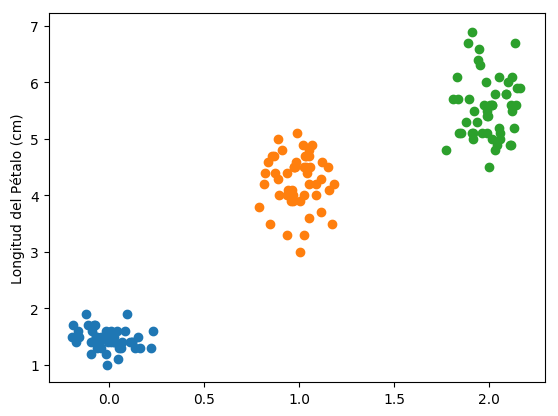

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of PyPlot
INFO: Use `Pkg.update()` to get the latest versions of your packages


PyObject <matplotlib.text.Text object at 0x7f6a01526e50>

In [4]:
# instalamos un paquete de Julia para poder visualizar los datos
Pkg.add("PyPlot")
using PyPlot

# graficamos la longitud de pétalo para el primer tipo de flores
scatter(0.1*randn(50,1),caracteristicas[1:50,1])
# agregamos la longitud de pétalo para el segundo tipo de flores
scatter(1+0.1*randn(50,1),caracteristicas[51:100,1])
# agregamos la longitud de pétalo para el tercer tipo de flores
scatter(2+0.1*randn(50,1),caracteristicas[101:150,1])
ylabel("Longitud del Pétalo (cm)")

En el siguiente espacio, trabaja con la persona junto a tí y grafiquen las cuatro características en cuatro figuras distintas. Determinen cuales son las dos características que mejor sirven para diferenciar las tres especies de flores.

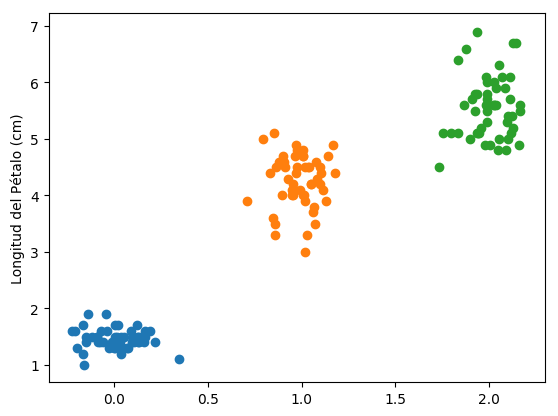

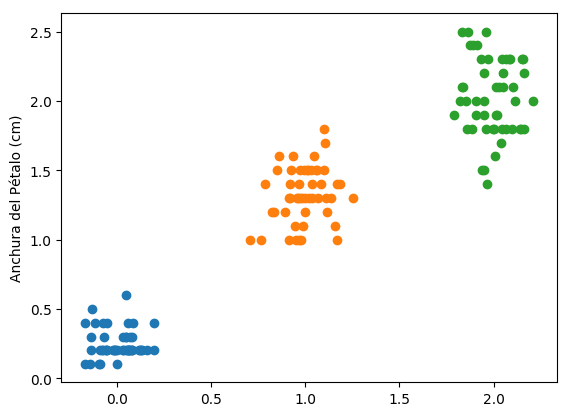

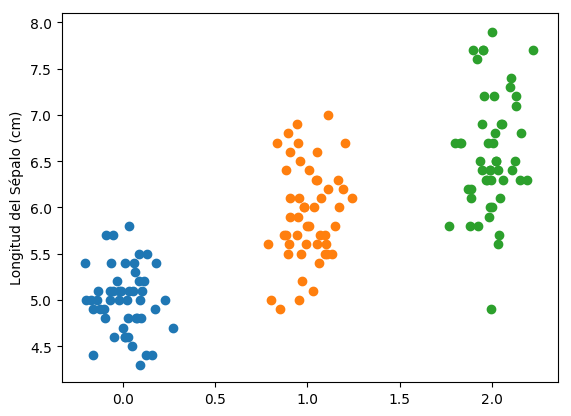

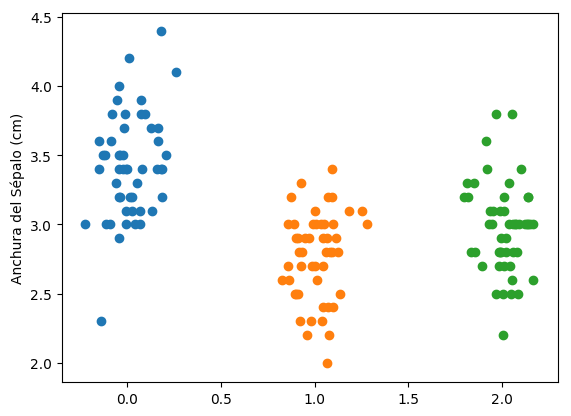

PyObject <matplotlib.text.Text object at 0x7f6a012ccc50>

In [5]:
# graficamos la longitud de pétalo para el primer tipo de flores
figure(1)
scatter(0.1*randn(50,1),caracteristicas[1:50,1])
scatter(1+0.1*randn(50,1),caracteristicas[51:100,1])
scatter(2+0.1*randn(50,1),caracteristicas[101:150,1])
ylabel("Longitud del Pétalo (cm)")

# graficamos la anchura del pétalo
figure(2)

# graficamos la longitud del sépalo
figure(3)

# graficamos la anchura del sépalo
figure(4)

Al parecer, las dos características que mejor separan los tres tipos de flores fueron la _______ de _______ y la _______ de _______. La siguiente figura muestra como estas dos características diferencian los tres tipos de flores.

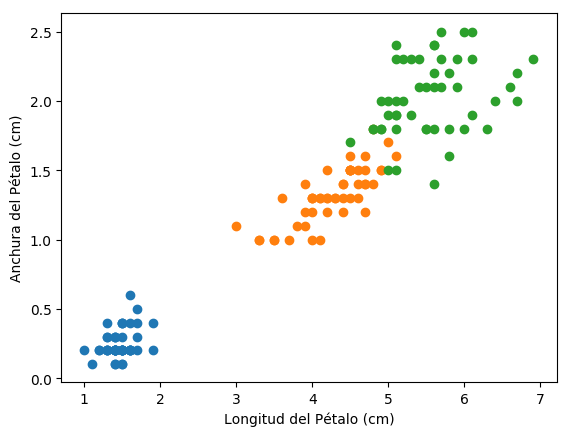

PyObject <matplotlib.text.Text object at 0x7f6a0118b610>

In [6]:
scatter(caracteristicas[1:50,1],caracteristicas[1:50,2])
scatter(caracteristicas[51:100,1],caracteristicas[51:100,2])
scatter(caracteristicas[101:150,1],caracteristicas[101:150,2])
xlabel("Longitud del Pétalo (cm)")
ylabel("Anchura del Pétalo (cm)")

Experimenta generando otras figuras donde grafiques otras características en los ejes x, y. Determina si alguna otra pareja de características sirve para diferenciar las tres especies de flores. Después procede a responder las siguientes preguntas con la persona sentada junto a tí.

Preguntas para reflexionar:

1. ¿Serán estas en realidad las mejores características para diferenciar estas especies de flores?
2. ¿Cuales son las mayores desventajas de usar estas características para diferenciar especies de flores?
3. ¿Qué otras características de flores podríamos utilizar para diferenciar distintas especies?
4. ¿Por qué dijimos al inicio que un objeto, en este caso un tipo de flor, tiene un número infinito de características?
5. Si salimos al campo y obtenemos medidas nuevas de una flor de cada especie que Fisher estudió, ¿serán nuestras medidas similares a las de Fisher? ¿Podrías estimar donde quedarían las medidas de flores nuevas en la última figura que generaste?

# Parte 1.2: Clasificación de Datos #

Usando una base de datos como la de Fisher podemos diseñar un método para determinar si las características de una flor pertenecen a uno de los tres grupos. Un método capáz de hacer esto es llamado un Algoritmo de Clasificación. 

Usando los datos de Fisher, ¿cómo podríamos diseñar un método para determinar si las características de una flor pertenecen a una especie específica?

Muchos algoritmos actuales para la clasificación de datos se enfocan en maximizar el producto interno entre dos vectores de la misma clase, donde uno de los vectores son las características de un objeto, y el otro vector son las características "promedio" de una clase específica.

Estudiemos esto con las dos características de las flores que midió Fisher que determinamos mejor sirven para separar distintas especies de flores. En la siguiente figura se observan estas dos características.

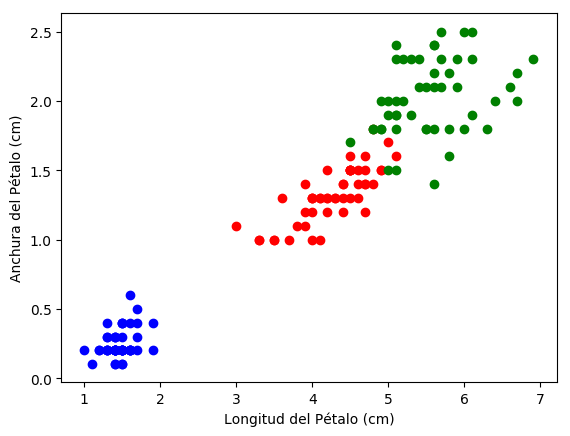

PyObject <matplotlib.text.Text object at 0x7fecac2b7550>

In [5]:
# graficamos las dos características que más sirven para diferenciar las especies de flores.
scatter(caracteristicas[1:50,1],caracteristicas[1:50,2], color="b")
scatter(caracteristicas[51:100,1],caracteristicas[51:100,2], color="r")
scatter(caracteristicas[101:150,1],caracteristicas[101:150,2], color="g")
xlabel("Longitud del Pétalo (cm)")
ylabel("Anchura del Pétalo (cm)")

Al trabajar con datos como estos, el primer paso es hacer que los datos estén centrados al rededor de cero. Esto se logra extrayendo las características promedio de todos los datos (globales). El siguiente bloque muestra como hacer esto.

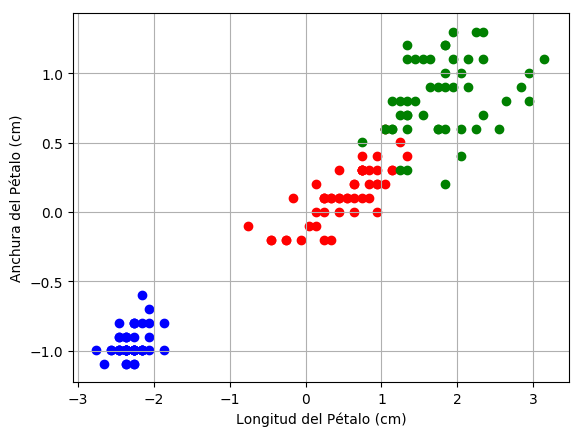

In [8]:
# generamos una variable con las dos características que nos interesan
x = [caracteristicas[:,1] caracteristicas[:,2]]

# obtenemos las características globales promedio
x_prom = mean(x,1)

# extraemos las caracteristicas globales promedio de nuestros datos
x = x - x_prom.*ones(150,2)

# graficamos nuevamente
scatter(x[1:50,1],x[1:50,2], color="b")
scatter(x[51:100,1],x[51:100,2], color="r")
scatter(x[101:150,1],x[101:150,2], color="g")
xlabel("Longitud del Pétalo (cm)")
ylabel("Anchura del Pétalo (cm)")
grid("on")

El siguiente paso consiste en encontrar el vector promedio para cada una de las expecies de plantas. El siguiente bloque muestra como se logra esto y también grafica los vectores con los datos.

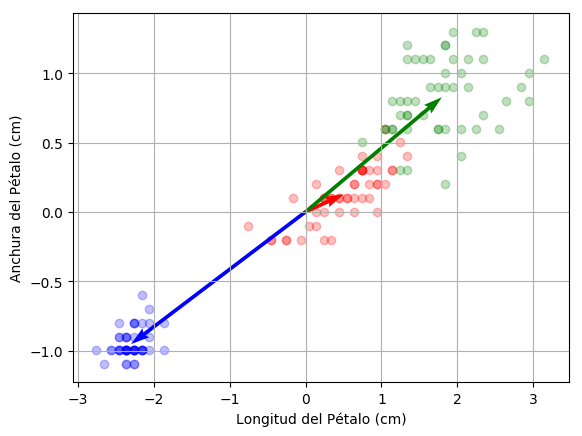

PyObject <matplotlib.quiver.Quiver object at 0x7f69fd8a4890>

In [9]:
# graficamos los datos nuevamente
scatter(x[1:50,1],x[1:50,2],alpha=0.25, color="b")
scatter(x[51:100,1],x[51:100,2],alpha=0.25, color="r")
scatter(x[101:150,1],x[101:150,2],alpha=0.25, color="g")
xlabel("Longitud del Pétalo (cm)")
ylabel("Anchura del Pétalo (cm)")
grid("on")

# obtenemos los vectores con las características promedio para cada una de las clases de flores
prom_1 = mean(x[1:50,:],1)
prom_2 = mean(x[51:100,:],1)
prom_3 = mean(x[101:150,:],1)

# graficamos los vectores
quiver(prom_1[1,1],prom_1[1,2],angles="xy", scale_units="xy", scale=1, color="b")
quiver(prom_2[1,1],prom_2[1,2],angles="xy", scale_units="xy", scale=1, color="r")
quiver(prom_3[1,1],prom_3[1,2],angles="xy", scale_units="xy", scale=1, color="g")

Como podemos ver, estos "vectores promedio" están máximamente alineados con los datos de las clases de flores que les corresponden. El siguiente bloque de código toma una hilera de datos aleatoriamente, y calcula el producto interno de estos datos con los tres vectores promedio. 

In [10]:
# escogemos aleatoriamente una ilera en los datos
ilera_al = rand(1:150,1)

# extraemos los datos de esta ilera en una variable nueva
x_muestra = x[ilera_al,:]

# calculamos el producto interno de esta muestra con cada uno de los vectores promedio
prod_1 = x_muestra*prom_1'
prod_2 = x_muestra*prom_2'
prod_3 = x_muestra*prom_3'

# imprimimos los resultados
print("el producto interno del vector muestra con de los vectores promedio correspondientes a las especies de plantas son: \n")
print("\n setosa ", prod_1)
print("\n versicolor ", prod_2)
print("\n virginica ", prod_3)
print("\n\ny la especie correcta del vector muestra es: \n")
print("\n ", especies[ilera_al])

el producto interno del vector muestra con de los vectores promedio correspondientes a las especies de plantas son: 

 setosa [6.13707]
 versicolor [-1.2601]
 virginica [-4.87697]

y la especie correcta del vector muestra es: 

 Any["setosa"]

Como podemos ver, el producto interno máximo es el que corresponde a la clase correcta de la especie de flor.

Preguntas para reflexionar en grupo:

1. ¿Cual sería el algoritmo a seguir si medimos una flor nueva y queremos determinar a que clase pertenece usando nuestro método?
2. ¿Son las características promedio de cada clase de flor el mejor método para clasificar los datos de Fisher?
3. ¿Qué problemas podríamos encontrar con nuestro método?

# Parte 1.3: Desarrollando un Algoritmo de Clasificación y Midiendo su Eficacia #

Supongamos que el método descrito en 1.2, clasificación  con las características promedio, es un algoritmo idoneo para la clasificación de datos. En esta sección desarrollaremos el algoritmo formalmente y mediremos su eficiencia.

Empezaremos por usar otra base de datos. Ahora la meta es clasificar tres tipos distintos de vinos en base a su contenido de alcohol, su contenido de Flavonoides, y su Densidad Optica relativa. El siguiente bloque prepara los datos.

In [11]:
# obtenemos los datos que necesitamos y los ponemos en una matriz de Julia
vinos = matread("wine.mat")
datos = vinos["data"]

# separamos las caracteristicas y los tipos de vino
caracteristicas = datos[:,2:end]
tipo_de_vino = datos[:,1];

En este punto tenemos una matriz `caracteristicas` con tamaño 135x3, cuyas ileras tienen las características de vinos distintos, y las columnas contienen las tres características. Hay tres tipos distintos de vinos, 45 ejemplos (o muestras) por cada clase. Las ileras 1 a 45 corresponden al tipo de vino No. 1, las ileras 46 a 90 corresponden al vino No. 2, y las ileras 91 a 135 corresponden al vino No. 3. El vector `tipo_de_vino` tiene los números 1, 2, y 3, los cuales indican el tipo de vino que corresponde a las ileras de la matriz `caracteristicas`.

Una vez que tenemos los datos listos, el siguiente paso es separar los datos aleatoriamente en dos grupos, uno para entrenar el algoritmo, y otro para probarlo. Normalmente guardamos cerca del 15% de los datos para probar el algoritmo después de entrenarlo. El siguiente bloque muestra como hacer esta separación.

In [21]:
# Tenemos 45 datos por cada clase, entonces seleccionaremos aleatoriamente 6 ileras de características (~15%) para  probar el algoritmo al final.

using StatsBase
# aleatorizamos los números en el rango del 1 al 45
vino_1_aleat = sample(1:45, 45, replace = false)
# aleatorizamos los números en el rango del 46 al 90
vino_2_aleat = sample(46:90, 45, replace = false)
# aleatorizamos los números en el rango del 91 al 135
vino_3_aleat = sample(91:135, 45, replace = false)

# separamos los datos que nos servirán para entrenar
x_entren = [caracteristicas[vino_1_aleat[1:39],:]; caracteristicas[vino_2_aleat[1:39],:]; caracteristicas[vino_3_aleat[1:39],:]]
y_entren = [tipo_de_vino[vino_1_aleat[1:39]]; tipo_de_vino[vino_2_aleat[1:39]]; tipo_de_vino[vino_3_aleat[1:39]]]

# separamos los datos que nos servirán para probar el algoritmo
x_prueba = [caracteristicas[vino_1_aleat[40:end],:]; caracteristicas[vino_2_aleat[40:end],:]; caracteristicas[vino_3_aleat[40:end],:]]
y_prueba = [tipo_de_vino[vino_1_aleat[40:end]]; tipo_de_vino[vino_2_aleat[40:end]]; tipo_de_vino[vino_3_aleat[40:end]]];

De aquí en adelante solo trabajaremos con las variables `x_entren` e `y_entren`, y dejaremos las variables `x_prueba` e `y_prueba` para el final.

Empezemos por visualizar los datos que tenemos disponibles para entrenar nuestro algoritmo. El siguiente bloque muestra esta visualización con las tres características que tenemos disponibles.

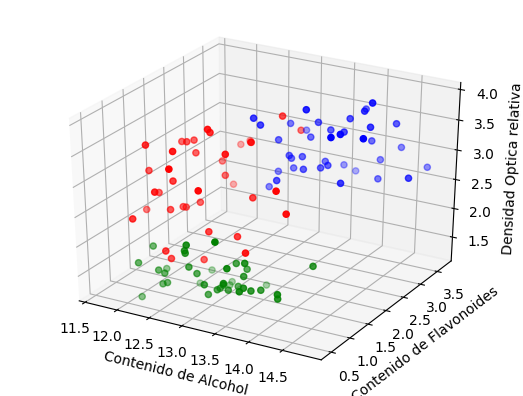

PyObject <matplotlib.text.Text object at 0x7f69fb7ecb10>

In [22]:
scatter3D(x_entren[1:39,1],x_entren[1:39,2],x_entren[1:39,3], color="b")
scatter3D(x_entren[40:78,1],x_entren[40:78,2],x_entren[40:78,3], color="r")
scatter3D(x_entren[79:end,1],x_entren[79:end,2],x_entren[79:end,3], color="g")
xlabel("Contenido de Alcohol")
ylabel("Contenido de Flavonoides")
zlabel("Densidad Optica relativa")

Ahora si podemos empezar a trabajar:

1. Recuerda que el primer paso es substraer el promedio global para hacer que los datos estén centrados en cero.

2. Después procederemos a encontrar las características promedio para cada uno de los tipos de vino. 

Recuerda que calcularemos el producto interno entre las características promedio de cada clase de vino con las ileras de `x_entren`.

En el siguiente bloque, trabaja en equipo para llevar a cabo estos pasos.

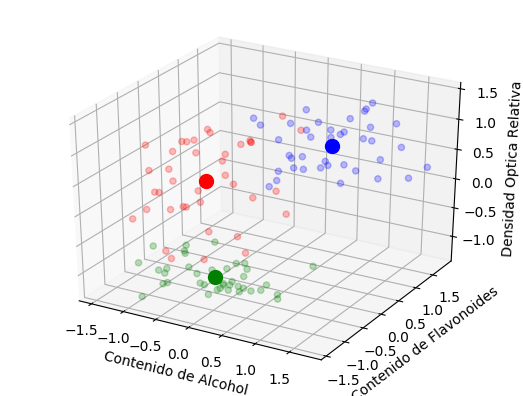

PyObject <matplotlib.text.Text object at 0x7f69fd9b3c90>

In [23]:
### 1. tu código aquí para substraer el promedio global a todos los datos ###
# obtenemos las características globales promedio
x_prom = 

# extraemos las caracteristicas globales promedio de nuestros datos
x_entren = 

### 2. tu código aquí para encontrar las características promedio para cada tipo de vino ###
prom_1 = 
prom_2 = 
prom_3 = 

# el siguiente código va a graficar los datos y las características promedio
scatter3D(x_entren[1:39,1],x_entren[1:39,2],x_entren[1:39,3], alpha = 0.25, color="b")
scatter3D(prom_1[1,1],prom_1[1,2],prom_1[1,3], s = 100, color="b")
scatter3D(x_entren[40:78,1],x_entren[40:78,2],x_entren[40:78,3], alpha = 0.25, color="r")
scatter3D(prom_2[1,1],prom_2[1,2],prom_2[1,3], s = 100, color="r")
scatter3D(x_entren[79:end,1],x_entren[79:end,2],x_entren[79:end,3], alpha = 0.25, color="g")
scatter3D(prom_3[1,1],prom_3[1,2],prom_3[1,3], s = 100,color="g")
xlabel("Contenido de Alcohol")
ylabel("Contenido de Flavonoides")
zlabel("Densidad Optica Relativa")

A continuación acomodaremos las características promedio para cada clase de vino en una matriz con dimensiones [3x3], donde las ileras corresponderán a los distintos tipos de vino, y las columnas a las características promedio para cada clase de vino. Esto nos permitirá hacer una multiplicación de matrices para encontrar el producto interno de nuestras características promedio con todos los datos que tenemos para entrenar el algoritmo.

A continuación, acomoda las características promedio en una matriz llamada `W`

In [24]:
### Tu código aquí para acomodar los vectores promedio en una matriz llamada W ###
W = 

3×3 Array{Float64,2}:
  0.628462    1.03718     0.646068
 -0.705385    0.0433333   0.147607
  0.0769231  -1.08051    -0.793675

Ahora lleva a cabo la operación $v = W~x_{entren}$, donde $W \in \mathbf{R^{3x3}}$, $x_{entren} \in \mathbf{R^{3x117}}$, y $v \in \mathbf{R^{3x117}}$.

Lo que queremos es encontrar la matriz `v`, cuyas columnas contendrán los valores que resultan al calcular el producto interno entre cada uno de los vectores promedio en `W` y las ileras de la matriz `x_entren`

In [25]:
### Tu código aquí para calcular la matriz v ###
v = 

3×117 Array{Float64,2}:
  2.48257    1.1112     2.08986   …  -1.65155    -1.90213   -0.151432
 -0.327114   0.292399  -0.439774      0.0310276  -0.255145  -0.980127
 -2.15545   -1.4036    -1.65009       1.62053     2.15727    1.13156 

Ahora que tenemos la matriz v, debemos encontrar en que índice de cada columna se encuentra el valor más alto. Ese valor indica que características promedio de un tipo de vino generaron el producto interno más alto con cada una de las ileras en `x_entren`.

El siguiente bloque identifica el índice de v con el valor más alto en cada columna.

In [26]:
# encontrando los máximos valores de cada columna y sus indices
v_max = findmax(v,1)

# encontrando solo los índices
v_max_ind = v_max[2] - range(0,117)'*3;

Una vez que sabemos que índices contienen el valor más grande para cada columna de `v`, comparamos estos valores con las clases verdaderas que tenemos en el vector `y_entren`. La fracción de índices en `v_max_ind` que resultan idénticos a los valores en `y_entren` nos dirá la presicón de nuestro algoritmo con los datos de entrenamiento.

El siguiente bloque muestra esta operación.

In [27]:
print("La precisión del algoritmo con los datos de entrenamiento fue: ", sum(v_max_ind .== y_entren')/length(y_entren))

La precisión del algoritmo con los datos de entrenamiento fue: 0.8632478632478633 %

Lo único que nos falta es evaluar nuestro algoritmo con los datos que guardamos para hacer la prueba final. En este punto ya tenemos la matriz `W` y no la debemos cambiar. Lo único que debemos hacer es evaluar la clasificación con los datos en las variables `x_prueba` y `y_prueba`. 

En el bloque siguiente, tabaja en equipo para evaluar la presición del algoritmo con los datos que guardamos para hacer esta prueba

In [34]:
### Escribe tu código aquí para llevar a cabo la evaluación del algoritmo con los datos prueba ###

Preguntas para reflexionar en grupo:

1. ¿en qué consistió el entrenamiento que hicimos en este algoritmo? 
2. ¿Para qué sirvieron los datos en las matrices `x_entren` y `x_prueba`?
3. ¿Crees que la forma en que generamos la matriz `W` es la mejor para otros tipos de datos?
4. ¿Con qué tipos de datos crees que las características promedio de distintas clases no nos ayude en mucho?
5. ¿De qué otras formas crees que podríamos generar la matriz `W` para obtener incluso mejores resultados?

---

# Parte 2: Construyendo Redes Neuronales Artificiales Desde Cero #

<img align="left" src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/300px-Colored_neural_network.svg.png" />

En un espacio "multidimensional" (como los espacios 2D y 3D que estudiamos previamente), podemos encontrar relaciones entre distintos puntos de datos en base a que tan cerca o lejos se encuentren unos de otros.

Previamente, usamos el [producto interno](https://es.wikipedia.org/wiki/Producto_escalar) para describir la distancia entre puntos distintos. 

La siguiente imagen ayudará a generar intuición sobre el producto interno:

<img src="https://www.mathsisfun.com/algebra/images/dot-product-ex1.gif"/>

Vemos los vectores $$a = [-6, 8]$$ y $$b = [5, 12]$$ en el espacio $\mathbf{R^{1x2}}$.

El producto interno entre estos dos vectores sería: $$a ~ b^T = (-6)(5) + (8)(12) = 66$$

Entonces, podemos considerar el valor $66$ omo un indicative de la similaridad entre los dos vectores.

Ahora recuerda la base de datos de vinos que estudiamos previamente:
<img src="fake_data.png" style="width: 360px"/>
Te puedes imaginar que para cada uno de los tres colores diferentes de datos, existe un vector que maximiza el producto interno entre dicho vector y la mayoría (o todos) los datos del mismo color.

Este vector puede ser considerado el "promedio" o "modelo" de todos los datos que comparten un mismo color.

Pensemos un poco más sobre los datos que acabamos de discutir.

Existen tres colores distintos, y cada punto de datos es tridimensional.

Esto indica que, usando datos de entrenamiento, podríamos identificar tres vectores "promedio" o "modelo" $\mathbf{R^{3x1}}$, uno para cada color.

Tras identificarlos, podríamos usarlos para identificar la identidad de datos nuevos no identificadoes en el mismo espacio tridimensional. Todo esto usando el valor de un producto interno.

Entonces, el algoritmo para identificar un punto de datos nuevo sería:

1. Asumimos que tenemos los vectores "modelo" $r$, $a$, y $v$ $\in \mathbf{R^{3x1}}$, uno por cada color de datos. Tenemos también un punto de datos $u$ no identificado ($u \in \mathbf{R^{1x3}}$). 

2. Para hacer todo en una sola operación, concatena los vectores $r$, $a$, y $v$ uno junto a otro para generar la matriz $W \in \mathbf{R^{3x3}}$.

3. Encuentra el producto interno entre $u ~W$ para obtener el vector $y \in \mathbf{R^{1x3}}$, el cual contiene el valor de similitud entre el vector $u$ y cada uno de los vectores "modelo" de los distintos colores.

4. Identifica cual fue el color que recibió el valor más alto en $y$, y ¡vualá!, hemos identificado el vector $u$.

En el mundo real, los datos pueden ser tan multidimensionales y complejos que encontrar estos vectores "modelo" es extremadamente difícil.

De hecho, con datos multidimensionales, encontrar estos vectores "modelo" se hace más y más complicado si tenemos pocos puntos de datos. ¿Puedes pensar por qué?

Aquí es donde las redes neuronales artificiales llegan a salvarnos. En pocas palabras, las redes neuronales artificiales encuentran estos vectores "modelo" usando los datos con identidades conocidas que les proporcionamos. 

Para poder pensar más objetivamente, piensa en la matriz $W \in \mathbf{R^{3x3}}$ como los parámetros de la función $$y ~= ~u ~W$$

Donde $u \in \mathbf{R^{1x3}}$ es un punto de datos desconocido y el vector $y \in \mathbf{R^{1x3}}$ contiene el valor de similitud entre en vector $u$ y cada uno de los colores de datos.

Ahora imagina que $u$ no es un punto de datos desconocido y en lugar su identidad es conocida. Entonces, usemos el punto de datos $x \in \mathbf{R^{1x3}}$, con el cual podemos pensar en la función $\hat{y} ~= ~x ~W$ como un objetivo. ¿Cual sería dicho objetivo?

Podemos decir que el objetivo es hacer que el valor del color verdadero para $x$ sea tan alto como sea posible.

$J = \text{Maximiza} \{\hat{y}_{correcto}\}$

Donde $\hat{y}_{correcto} \in \hat{y}$

Afortunadamento, esta es una función matemática y, asumiento que es diferenciable, podemos calcular la derivada del objetivo respecto a los parámetros $W$ para "ascender" a un valor más alto para el color correcto.

Entonces, queremos:

$\frac{\partial J}{\partial W}$

Usamos la regla de la cadena para expandir esta expresión a:

$\frac{\partial J}{\partial W} ~= \big(~\frac{\partial \hat{y}}{\partial W}\big)^T ~\frac{\partial J}{\partial \hat{y}} $

Como el objetivo solo depende de $\hat{y}_{correcto}$ (osea, solo nos importa el valor que contiene $\hat{y}_{correcto}$), la derivada de $\frac{\partial J}{\partial \hat{y}} = $ ?



La derivada de $\frac{\partial J}{\partial \hat{y}} = e_{correcto}$

donde $e_{correcto}$ es un vector "one-hot" $\mathbf{R^{1x3}}$. "One-hot" significa que todos los valores en este vector son cero, excepto en el índice que contiene el valor de la clase correcta en $\hat{y}$, donde tiene un valor de uno.

Así, la derivada completa es:

$\frac{\partial J}{\partial W} ~= ~\big(\frac{\partial \hat{y}}{\partial W}\big)^T ~e_{correcto} ~= ~\big(\frac{\partial xW}{\partial W}\big)^T ~e_{correcto}  ~= ~x^T~e_{correcto}$

Entonces, si queremos actualizar los parametros $W$ para dar un paso en la dirección que maximiza el valor de la función objetivo $J$, tendríamos que actualizar $W$ con la expresión:

$W := ~W + ~\alpha~x^T~e_{correcto}$

Donde $:=$ indica que se actualizará el valor de la variable a la izquierda, y $\alpha$ es un parametro libre que se  afina para determinar que tanto queremos que $\frac{\partial J}{\partial W}$ afecte los parametros $W$.

¿Cual es tu intuición sobre lo que está pasando aquí? ¿Podrías explicárselo a alguien?

Discute en equipo y prepárate para compartir tus observaciones con la clase.

Ahora comprobemos que todas las expresiones que acabamos de estudiar nos pueden ayudar a maximizar el valor correcto de un punto de datos.

Para hacer esto, usaremos una versión pequeña de la base de datos [MNIST](http://yann.lecun.com/exdb/mnist/). Estos datos son los números del 0 al 9 (o dígitos) escritos a mano en papel, y digitizados como pixeles en blanco y negro con definición de 28x28. 

Por cada número, tenemos 100 ejemplos de escritura a mano. El siguiente bloque carga los datos.

In [1]:
using MAT

# obtenemos los datos que necesitamos
mnist = matread("mnist.mat")
caracteristicas = mnist["cars"]
clase_de_digito = mnist["desc"];

La matriz `caracteristicas` tiene tamaño 1000x784. Cada ilera es un dígito, y las columnas son sus pixeles correspondintes. Las primeras 100 ileras corresponden al dígito 0, las siguientes 100 ileras corresponden al dígito 1, las siguientes 100 ileras corresponden al dígito 2, y así sucesivamente hasta el dígito 9.

Por cada punto de datos, los pixeles que generan una imagen 28x28 han sido aplanados en un vector de tamaño 1x784.

El vector `clase_de_digito` tiene tamaño 1000x1 y contiene la clase de dígito que le corresponde a cada ilera de la matriz caracteristicas.

El siguiente bloque visualiza algunos de los datos

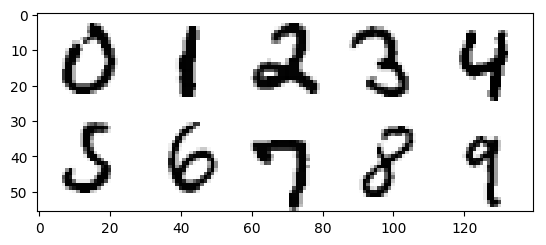

PyObject <matplotlib.image.AxesImage object at 0x7f148588e190>

In [2]:
dimensionalidad = 784
pixeles_por_lado = Int(sqrt(784))

# escogemos aleatoriamente un número entre 1 y 100
aleat_i = rand(1:100,1)

# inicializamos una matriz para visualizar un ejemplo de cada dígito
mat_p_vis = zeros(pixeles_por_lado*2,pixeles_por_lado*5)

# iteramos sobre los digitos (del 0 al 9) para llenar la matriz de visualización
for i=0:9

    este_digito = reshape(caracteristicas[100*i + aleat_i,:],pixeles_por_lado,pixeles_por_lado)
 
 # muy feo pero sirve para llenar la matriz que visualiza los dígitos (¡puntos extra a quien lo pueda hacer más elegantemente!)
    mat_p_vis[floor(Int,i/5)*pixeles_por_lado+1:floor(Int,i/5)*pixeles_por_lado+pixeles_por_lado,mod(i,5)*pixeles_por_lado+1:mod(i,5)*pixeles_por_lado+pixeles_por_lado] = este_digito
end

using PyPlot
imshow(mat_p_vis,cmap="Greys")

Preguntas para discusión: ¿por qué nos referimos a los pixeles como "características"? ¿Cómo son los pixeles similares o diferentes a las características que usamos previamente para describir flores y vinos?

Ahora que hemos entendido los datos MNIST, trabaja en equipo para separar aleatoriamente los datos en dos grupos: de entrenamiento y de prueba. Genera las variables `x_entren`, `y_entren`, `x_prueba` e `y_prueba`.

También recuerda que debes substraerle a tus datos las características de promedio globales antes de empezar a desarrollar tu algoritmo.

(Tip: puedes reusar mucho código que escribimos previamente)

In [22]:
### Separa los datos que servirán para entrenar y para probar tus algoritmos ###

### Substrae las características globales ###

Ahora, genera la matriz `W` que entrenaremos. Genérala usando numeros aleatorios pequeños con un promedio de cero. ¿Cuales deben ser sus dimensiones?

Itera sobre cada uno de los puntos de datos que reservaste para entrenar el algoritmo y calcula la derivada del objetivo $J$ respecto a los parametros $W$. Actualiza los parametros $W$ usando la regla $W := ~W + ~\alpha~x^T~e_{correcto}$ con cada uno de los puntos de datos. Guarda el valor de $J$ para cada uno de los datos.

Cuando termines de iterar sobre todos los puntos de datos, grafica el objetivo $J$ de cada uno de los puntos de datos.

Lo que queremos ver es que la mariz `W` puede ser cambiada para maximizar objetivo con los datos que estámos entrenando.

Reto: si terminas antes que todos los demás, ¿puedes implementar esto sin usar un ciclo `for`?

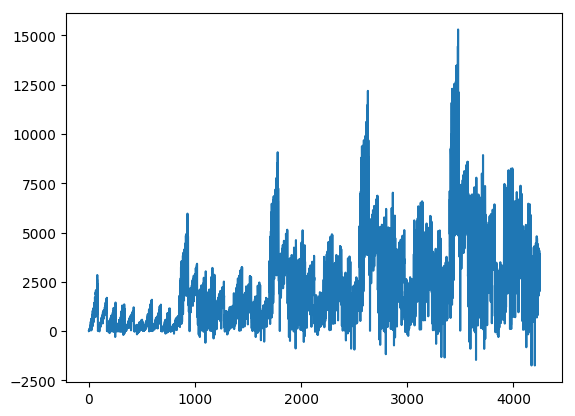

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f147fbbe490>

In [55]:
### tu código aquí ###

¿Qué notaste?

¿Cuales son las limitantes de este método para entrenar el algoritmo?

Discute en grupo y prepárate para compartir con todas las personas en la clase.

Una gran limitación del método discutido hasta ahora es como está definido el objetivo.

Si lo piensas bien, el valor podría seguir creciendo por siempre. Entonces, el proceso de "apredizaje" de los parametros $W$ podría continuar por siempre.

Debe haber una mejor alternativa.

¿Cómo podríamos modificar el objetivo $J = \text{Maximiza} \{\hat{y}_{correcto} ~= ~x ~W\}$ para asegurarnos que hay un límite de apredizaje?

Muy facilmente podemos hacer que el objetivo sea:

$J = \text{Maximiza} \bigg\{\hat{y}_{correcto}\bigg\}$

donde

$\hat{y} = \frac{~x ~W}{\sum_{i}~x ~W}$

¿por qué?

Ahora usamos la regla de la cadena para diferenciar la expresión respecto a los parametros $W$.

$\frac{\partial J}{\partial W} ~= ~\frac{\partial J}{\partial \hat{y}} ~\frac{\partial \hat{y}}{\partial W}$

$\frac{\partial J}{\partial W} ~= ~\big(\frac{\partial ~x ~W}{\partial W}\big)^T~\frac{\partial J}{\partial \hat{y}} ~\frac{\partial ~\hat{y}}{\partial ~x ~W}$

$\frac{\partial J}{\partial W} ~= ~\big(\frac{\partial ~x ~W}{\partial W}\big)^T~\frac{\partial J}{\partial \hat{y}} ~\frac{\partial ~\frac{~x ~W}{\sum_{i}~x ~W}}{\partial ~x ~W} $

De aquí ya sabemos que $\frac{\partial J}{\partial \hat{y}} = e_{correcto}$


Para encontrar $\frac{\partial ~\frac{~x ~W}{\sum_{i}~x ~W}}{\partial ~x ~W}$, definamos $v = ~x ~W$, donde $v$ es "valores". Entonces tendremos que encontrar el jacobiano:

$$ \frac{\partial ~\hat{y}}{\partial ~x ~W} = ~\frac{\partial ~\frac{v}{\sum_{i}~v}}{\partial ~v} = ~\frac{\partial ~\frac{~x ~W}{\sum_{i}~x ~W}}{\partial ~x ~W} = ~\begin{bmatrix} \frac{\partial \hat{y}_1}{\partial v_1} & \frac{\partial \hat{y}_1}{\partial v_2} & \dots & \frac{\partial \hat{y}_1}{\partial v_n} \\ \frac{\partial \hat{y}_2}{\partial v_1} & \frac{\partial \hat{y}_2}{\partial v_2}& \dots & \vdots \\ 
\vdots & \vdots & \ddots & \vdots\\
\frac{\partial \hat{y}_n}{\partial v_1} & \frac{\partial \hat{y}_n}{\partial v_2} & \dots & \frac{\partial \hat{y}_n}{\partial v_n} \end{bmatrix}$$

Pero en este momento podemos ver que el jacobiano $\frac{\partial ~\hat{y}}{\partial ~x ~W}$ será multiplicado por el vector "one-hot" $e_{correcto}$ con un producto interno. Esto hará que todos los valores del jacobiano se conviertan en cero, a excepción de: 

$$e_{correcto} \frac{\partial ~\hat{y}}{\partial ~x ~W} = ~\begin{bmatrix} \frac{\partial \hat{y}_{correcto}}{\partial v_1} & \frac{\partial \hat{y}_{correcto}}{\partial v_2} & \dots & \frac{\partial \hat{y}_{correcto}}{\partial v_n} \end{bmatrix}$$

Tambien se nos hace notar que:

$$~i = j \rightarrow ~\frac{\partial \hat{y}_i}{\partial v_j} = \frac{\sum_{i\neq j} v}{(\sum v)^2}$$

$$~i \neq j \rightarrow ~\frac{\partial \hat{y}_i}{\partial v_j} = -~\frac{v_i}{(\sum v)^2} = -~\frac{\hat{y}_i}{\sum v}$$

Entonces, en resumen, recordemos que:

$\frac{\partial J}{\partial W} ~= ~\big(\frac{\partial ~x ~W}{\partial W}\big)^T~\frac{\partial J}{\partial \hat{y}} ~\frac{\partial ~\frac{~x ~W}{\sum_{i}~x ~W}}{\partial ~x ~W} $

Pero sabiendo que $~\frac{\partial J}{\partial \hat{y}} ~\frac{\partial ~\frac{~x ~W}{\sum_{i}~x ~W}}{\partial ~x ~W} = ~\frac{\partial J}{\partial v}$ podemos escribir todo como:

$\frac{\partial J}{\partial W} ~= ~\big(\frac{\partial ~x ~W}{\partial W}\big)^T ~\frac{\partial J}{\partial v} $

Sabiendo todo esto, modifica tu programa anterior para que esta vez el objetivo sea: $$J = \text{Maximiza} \bigg\{\hat{y}_{correcto}\bigg\}$$

Y la actualización de los parametros $W$ se mueva de acuerdo a:

$W := ~W + ~\alpha~\frac{\partial J}{\partial W}$

Nota que en esta ocasión `W` debe ser inicializado para que contenga exclusivamente numeros positivos. ¿Por qué?

Experimenta también cambiado el parametro $\alpha$. 

(Tip: es posible que tengas que mostrarle los datos a tu algoritmo más de una vez para que el "apredizaje" pueda suceder.)

¿Puedes anticipar problemas?

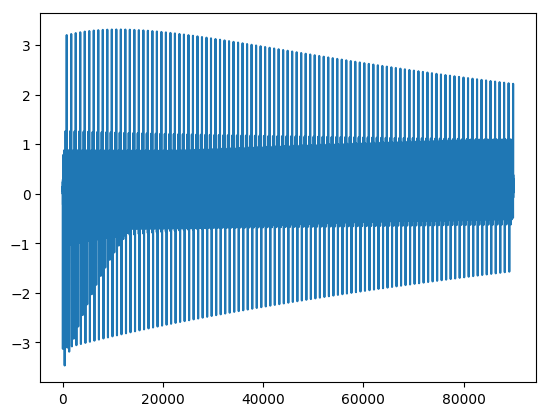

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fcd053c5c50>

In [16]:
### tu código aquí ###

# asuman que ya tenemos definido W

# for n=1:N

# forward pass
v = W*x_entren[n,:] # estos son los valores
y_hat = v/sum(v) # estas son las probablidades

# obtener el objetivo
J_n = y_hat[y_entren[n] + 1] 

# backward pass
dy_dv = -y_hat/sum(v)
dy_dv[y_entren[n] + 1] = (sum(v) - v[y_entren[n] + 1])/sum(v)^2
dJ_dW = x_entren[n,:]'*dy_dv[y_entren[n] + 1]

W = W + alpha*dJ_dW

# end




Si haces que Julia imprima los parametros `W` y la direfenciación `dJ_dW` en cada iteración, ¿Qué observas? ¿Puede haber algo que imposibilite el proceso de aprendizaje?

¿qué hace esto último que hemos intentado un mejor o peor método para aprender los parametros $W$?

Discute en grupo y prepara observaciones para compartir con el resto de la clase.

El objectivo que describimos previamente dará resultados sin sentido cuando $W := ~W + ~\alpha~\frac{\partial J}{\partial W}$ introduzca valores negativos a la matriz de parametros $W$. 

Afortunadamente, existe un mejor objetivo que podemos escoger. De hecho, nadie usa los objetivos que hemos descrito hasta ahora (solo fueron pensados como ejemplos para ganar intuición matemática desde cero).

El objectivo que es preferido para entrenar redes neuronales artificales se llama $softmax()$.

$Softmax()$ es similar al objetivo $J = \text{Maximiza} \bigg\{\hat{y}_{correcto}\bigg\}$, pero está blindada contra números negativos.

Antes de entrar a $softmax()$, hagamos un sumario de los elementos de una red neuronal artificial que hemos estudiado hasta ahora.

Una red neuronal artifical simple puede ser descrita con la expresión:

$$J = Objetivo \big\{\hat{y} = ~f(x~W)\big\}$$

* Donde $x$ contiene un punto de dato
* $W$ contiene los parametros que se van a "aprender"
* $f()$ es la función que determina el límite de valores obtenidos del producto interno entre $x~W$
* y el $Objetivo \{\}$ determina lo que queremos maximizar (o incluso reducir).

De estos cuatro elementos, son dos los que podemos modificar para mejorar significativamente como aprende una red neuronal artificial.

El primero es la función $f()$:
$$softmax(\theta) = \frac{e^\theta}{\sum e^\theta}$$
Donde, $\theta \in \mathbf{R^{1xC}}$ es el vector de "valores" para cada categoria de objetos.

Si lo piensas bien, elevando $e$ al poder del vectore de "valores" nos aseguramos que $\hat{y}$ nunca tendrá números negativos.

Cuando los "valores" contienen valores negativos, elevando e al poder de cualquier número real siempre nos dará un número positivo.

Incluso $e^{-\infty} = 0$ es un número positivo (si consideras $0$ como un número positivo), pero en la práctica nunca te encontrarás con esta situación.


$$softmax(\theta) = \frac{e^\theta}{\sum e^\theta}$$

Otra cosa importante de $softmax$ es que, al dividir $\frac{e^\theta}{\sum e^\theta}$ el vector $\hat{y}$ solo tendrá números entre $0$ y $1$, y los valores en el vector siempre sumarán a $1$, siempre. 

Finalmente, la función $e^{\theta}$ es una función no-lineal y, como verás, las no-linearidades son cruciales para ayudar a las redes neuronales a aprender.

Esto concluye una de las cosas que vamos a modificar. De ahora en adelante $\hat{y} = f(x~W) =  softmax(x~W) = \frac{e^{x~W}}{\sum e^{x~W}}$

La otra cosa es la función Objetivo. Hasta ahora, podemos decir que la función objetivo ha sido definida como:

$$Objetivo\{\hat{y}\} = maximiza\{\hat{y}_{correcto}\}$$

Pero existe una mejor función objetivo, y de hecho es como "el alma gemela de" $softmax()$.

El objetivo que vamos a usar se llama [entropía cruzada](https://en.wikipedia.org/wiki/Cross_entropy), y es definida como:

$$J = minimiza\{-log(\hat{y}_{correcto})\}$$

Intuitivemente, esta función busca maximizar el valor de $\hat{y}_{correcto}$, porque si $\hat{y}_{correcto}$ se acerca a su máximo posible de $1$ (en práctica es imposible alcanzar este valor), el valor de $J$ sería $$J = -\log(\hat{y}_{correcto}) = -\log(1) = 0$$

Contrariamente, cuando $\hat{y}_{correcto}$ contiene el número menor posible de $0$, el resultado es: $$J = -\log(\hat{y}_{correcto}) = -\log(0) = \infty$$

Entonces $\frac{\partial J }{\partial W}$ ahora será:

$\frac{\partial J }{\partial W} = ~\big(\frac{\partial ~x ~W}{\partial W}\big)^T~\frac{\partial J}{\partial \hat{y}} ~\frac{\partial \hat{y}}{\partial ~x ~W}$

Donde: 
$$~\frac{\partial J}{\partial \hat{y}}~\frac{\partial \hat{y}}{\partial ~x ~W} = \hat{y} - e_{correcto}$$

Si quieres entender esta última expresión, intenta hacer la prueba tu mismo, o visita este [sitio web (en inglés)](http://peterroelants.github.io/posts/neural_network_implementation_intermezzo02/)

Modifica tu programa anterior para que esta vez la función objetivo sea:

$$J = minimiza\{-log(\hat{y}_{correcto})\}$$

Y la actualización en la dirección que minimiza el valor del objetivo sea:

$W := ~W - ~\alpha~\frac{\partial J}{\partial W}$

¿Por qué usamos un signo negativo esta vez?

[Descenso por Gradiente](https://turing.iimas.unam.mx/~ivanvladimir/post/gradient_descent)

Experimenta una vez más cambiando el parametro $\alpha$.

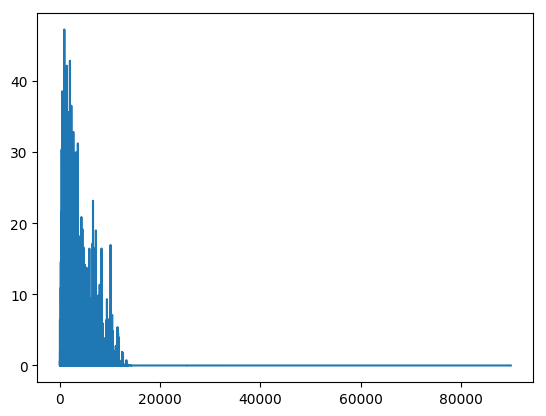

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fcd04fa8a10>

In [19]:
### tu código aquí ###

¿Qué notaste?

¿Qué hace que este sea un mejor método para hacer que una red neuronal artifical aprenda?

Discute en grupo y prepara observaciones para discutir con toda la clase.

---

Previamente construimos un clasificador $softmax$ con el objetivo:
$$J = minimiza\{-log(\hat{y}_{correcto})\}$$

Donde: $$\hat{y}_{correcto} \in \hat{y}$$ $$\hat{y} = softmax(x~W)$$

El algoritmo de $softmax$ requiere los siguientes pasos para calcular el objetivo:

1. Multiplica tu punto de datos $x$ por la matriz $W$ para obtener los valores (llámalos $v$) para cada clase.
2. Calcula $softmax(v)$ para obtener $\hat{y}$ (las "probabilidades" de cada clase).
3. Calcula el objetivo de la entropía cruzada (también conocido como "la pérdida de entropía cruzada")

Para actualizar los parámetros $W$, los pasos son:

1. Calcula la derivada de la función objetivo respecto a los parametros $W$
2. Actualiza los parametros usando la derivada que calculaste.

$Softmax$ puede ser convertido en una red neuronal artifical de verdad al agregarle una "capa oculta" entre los datos $x$ y el paso donde se calculan los valores. Todos los demás pasos se mantienen iguales.

Los pasos para calcular el objetivo entonces son:

1. Multiplica tu punto de datos $x$ por la matriz $W^{(h)} \in \mathbf{R^{DxH}}$ (donde $(h)$ identifica la matriz, y $\mathbf{H}$ es el número de columnas) para obtener es estado oculto $h \in \mathbf{R^{1xH}}$.
1. multiplica el estado oculto $h$ por la matriz de salida $W^{(o)} \in \mathbf{R^{HxC}}$ (donde $(o)$ identifica la matriz) para obtener los valores $v$ de cada clase.
2. Calcula $softmax(v)$ para obtener $\hat{y}$ (las "probabilidades" de cada clase).
3. Calcula el objetivo de entropía cruzada (también conocido como "pérdida de entropía cruzada")

El objetivo sigue siendo el mismo, pero $\hat{y}$ ahora es:
$\hat{y} = softmax(x~W^{(h)}~W^{(o)})$

Para actualizar los parámetros, los pasos son:

1. Calcula la derivada del objetivo respecto a los parámetros $W^{(h)}$ y $W^{(o)}$.
2. Actualiza los parámetros usando las derivadas que calculaste.

Como puedes ver, ahora tendremos que calcular dos derivadas:

$\frac{\partial J}{\partial W^{(h)}}$

$\frac{\partial J}{\partial W^{(o)}}$

Estas derivadas serían similares a las que calculaste anteriormente (observa que los valores $v$ ahora son $v=~x ~W^{(h)} ~W^{(o)}$):

$\frac{\partial J }{\partial W^{(h)}} = ~\big(\frac{\partial ~x ~W^{(h)} ~W^{(o)}}{\partial W^{(h)}}\big)^T~\frac{\partial J}{\partial \hat{y}} ~\frac{\partial \hat{y}}{\partial ~x ~W^{(h)} ~W^{(o)}} = ~\big(\frac{\partial ~x ~W^{(h)} ~W^{(o)}}{\partial W^{(h)}}\big)^T~\frac{\partial J}{\partial v} = \big(x^T~\frac{\partial J}{\partial v}\big) ~\big(W^{(o)}\big)^T$

$\frac{\partial J }{\partial W^{(o)}} = ~\big(\frac{\partial ~x ~W^{(h)} ~W^{(o)}}{\partial W^{(o)}}\big)^T~\frac{\partial J}{\partial \hat{y}} ~\frac{\partial \hat{y}}{\partial ~x ~W^{(h)} ~W^{(o)}} = ~\big(\frac{\partial ~x ~W^{(h)} ~W^{(o)}}{\partial W^{(o)}}\big)^T ~\frac{\partial J}{\partial v} = \bigg(~\big(W^{(h)}\big)^T~x^T\bigg)~\frac{\partial J}{\partial v}$

Modifica tu programa anterior par que esta vez entrenemos una red neuronal artifical con una capa oculta. Primero tendrás que cargar los datos MNIST y separarlos en datos que servirán para entrenar y para probar la red neuronal. No te olvides de prepararlos removiendo las características promedio.

Experimenta cambiando todos los parámetros que tienes disponibles. ¿Cuáles son estos ahora que tenemos una red neuronal completa?

In [ ]:
### tu código aquí ###

¿Qué notaste? ¿Qué efecto hubo al cambiar los parametros que puedes afinar?

¿Es esta la mejor manera posible de entrenar una red neuronal artifical?

Discute en grupo y prepárate para compartir tus observaciones con el resto de la clase.

El siguiente paso para hacer esta red neuronal aún más potente es agregar una función no-lineal $f()$ justo antes de alcanzar la capa oculta. Esta es una práctica muy común. El modelo entonces calcularía:

$$\hat{y} = softmax( ~f(x~W^{(h)})~W^{(o)})$$

Hay una variedad de distintas no-linearides que se pueden usar. De hecho, hay gente que dedican sus maestrías y doctorados a investigar las mejores no-linearidades que se pueden usar en una red neuronal artificial.

No-linearidades comunes son:

* $\sigma(\theta)$ (la [función sigmoide](https://en.wikipedia.org/wiki/Sigmoid_function))
* $\tanh(\theta)$ (la [tangente hyperbólica](http://reference.wolfram.com/language/ref/Tanh.html.en))
* $\text{ReLU}(\theta) = f(\theta)=\max(0,\theta)$ (el rectificador lineal)

Para los propósitos de este curso, nos enfocaremos en las primeras dos, pero ten la libertad de experimentar con cualquier no-linearidad que quieras.

Como podrás esperar, es crucial conocer la derivada de la no-linearidad que escojas para poder usarla en una red neuronal artificial:

Afortunadamente, las derivadas de $\sigma(\theta)$ y $\tanh(\theta)$ respecto a $\theta$ con muy simples:

$$\frac{\partial \sigma(\theta)}{\partial \theta} = \sigma(\theta)(1-\sigma(\theta)) $$

$$\frac{\partial \tanh(\theta)}{\partial \theta} = 1-\tanh^2(\theta)$$

Para nuestro estudio, enfoquémonos en la sigmoide $\sigma(\theta)$ para obtener la siguiente expresión:

$$\hat{y} = softmax( ~\sigma(x~W^{(h)})~W^{(o)})$$

Modifica tu programa anterior para que esta vez tengas una red neuronal artificial con una capa oculata y la no-linearidad sigmoide.

Julia no tiene una función sigmoide, por lo que vas a tener que escribir la tuya.

Experimenta cambiando los parámetros afinables. Tabien intenta cambiando como inicializas los parámetros $W^{(h)}$ y $W^{(o)}$. ¿Podría afectar eso en algo?

In [ ]:
### tu código aquí ###

Y así, hemos concluido la construcción de una Red Neuronal Artifical desde cero.

Experimenta con otras no-linearidades y agrega más capas ocultas (incluso mezclando distintas no-linearidades entre ellas). No te olvides de afinar los parámetros.

¡Felicidades!

---

# Parte 3: Optimizando una Red Neuronal Artificial con los datos MNIST #

En esta sección estudiaremos como se optimiza una red neuronal usando la técnica de validación cruzada y como se regularizan las neuronas. 

Para esto usaremos una versión un poco más grande de los datos MNIST. Ahora tenemos 1000 puntos de datos por cada dígito. El siguiente bloque carga todos los datos.

In [1]:
using MAT

# obtenemos los datos que necesitamos
mnist = matread("mnist_mas.mat")
caracteristicas = mnist["cars"]
clase_de_digito = mnist["desc"];

Como ya lo sabemos, el primer paso es separar los datos en un grupo de entrenamiento y otro de prueba. En esta ocasión usaremos solo 5% de los datos como prueba. El siguiente bloque lleva a cabo esta operación y también substrae las características globales promedio.

In [2]:
using StatsBase

# aleatorizamos los indices de las ileras que corresponden a cada dígito
dig_0_aleat = sample(1:1000, 1000, replace = false)
dig_1_aleat = sample(1001:2000, 1000, replace = false)
dig_2_aleat = sample(2001:3000, 1000, replace = false)
dig_3_aleat = sample(3001:4000, 1000, replace = false)
dig_4_aleat = sample(4001:5000, 1000, replace = false)
dig_5_aleat = sample(5001:6000, 1000, replace = false)
dig_6_aleat = sample(6001:7000, 1000, replace = false)
dig_7_aleat = sample(7001:8000, 1000, replace = false)
dig_8_aleat = sample(8001:9000, 1000, replace = false)
dig_9_aleat = sample(9001:10000, 1000, replace = false)

# separamos los datos que nos servirán para entrenar
x_entren = [
    caracteristicas[dig_0_aleat[1:950],:];
    caracteristicas[dig_1_aleat[1:950],:];
    caracteristicas[dig_2_aleat[1:950],:];
    caracteristicas[dig_3_aleat[1:950],:];
    caracteristicas[dig_4_aleat[1:950],:];
    caracteristicas[dig_5_aleat[1:950],:];
    caracteristicas[dig_6_aleat[1:950],:];
    caracteristicas[dig_7_aleat[1:950],:];
    caracteristicas[dig_8_aleat[1:950],:];
    caracteristicas[dig_9_aleat[1:950],:];
]
y_entren = [
    clase_de_digito[dig_0_aleat[1:950],:];
    clase_de_digito[dig_1_aleat[1:950],:];
    clase_de_digito[dig_2_aleat[1:950],:];
    clase_de_digito[dig_3_aleat[1:950],:];
    clase_de_digito[dig_4_aleat[1:950],:];
    clase_de_digito[dig_5_aleat[1:950],:];
    clase_de_digito[dig_6_aleat[1:950],:];
    clase_de_digito[dig_7_aleat[1:950],:];
    clase_de_digito[dig_8_aleat[1:950],:];
    clase_de_digito[dig_9_aleat[1:950],:];
]


# separamos los datos que nos servirán para probar
x_prueba = [
    caracteristicas[dig_0_aleat[951:end],:];
    caracteristicas[dig_1_aleat[951:end],:];
    caracteristicas[dig_2_aleat[951:end],:];
    caracteristicas[dig_3_aleat[951:end],:];
    caracteristicas[dig_4_aleat[951:end],:];
    caracteristicas[dig_5_aleat[951:end],:];
    caracteristicas[dig_6_aleat[951:end],:];
    caracteristicas[dig_7_aleat[951:end],:];
    caracteristicas[dig_8_aleat[951:end],:];
    caracteristicas[dig_9_aleat[951:end],:];
]
y_prueba = [
    clase_de_digito[dig_0_aleat[951:end],:];
    clase_de_digito[dig_1_aleat[951:end],:];
    clase_de_digito[dig_2_aleat[951:end],:];
    clase_de_digito[dig_3_aleat[951:end],:];
    clase_de_digito[dig_4_aleat[951:end],:];
    clase_de_digito[dig_5_aleat[951:end],:];
    clase_de_digito[dig_6_aleat[951:end],:];
    clase_de_digito[dig_7_aleat[951:end],:];
    clase_de_digito[dig_8_aleat[951:end],:];
    clase_de_digito[dig_9_aleat[951:end],:];
]

# removemos las caracteristicas globales promedio de x_entren y x_prueba
x_prom = mean(x_entren,1)

x_entren = x_entren - x_prom.*ones(size(x_entren))
x_prueba = x_prueba - x_prom.*ones(size(x_prueba));

Ahora recordemos cuales son los parámetros que podemos afinar al entrenar una red neuronal artificial:
1. Taza de aprendizaje
2. Número de capas ocultas
3. Dimensionalidad de la(s) capa(s) oculta(s)
4. No-linearidad aplicada en la(s) capa(s) oculta(s)
5. La regularización aplicada a los parámetros $W$ y la fuerza ($\lambda$) con que queremos regularizar dichos parámetros (explicado más abajo).
6. Número de épocas (las veces que le mostramos todos los datos a la red neuronal artificial)

Como podremos imaginarnos, estos parámetros pueden afectar como la red neuronal aprende los datos. Por eso es importante explorar distintas posibilidades para encontrar el mejor desempeño de la red neuronal.

La validación cruzada nos permite explorar el desempeño de la red neuronal al variar estos parámetros.

El truco de la validación cruzada consiste en separar nuestros datos de entrenamiento en dos grupos:
1. uno para entrenar y 
2. uno para validar el entrenamiento

Normalmente, podemos reservar aleatoriamente 10% del total original de los datos como validación. 

Entonces, usaremos los datos de entrenamiento para aprender los parámetros W, y usaremos los datos de validación para juzgar como se desempeña nuestro algoritmo tras haber sido entrenado. Si vemos que el desempeño con los datos de validación no es óptimo, podemos cambiar uno o más de los parámetros para así volver a entrenar y ver si el cambio de parámetros mejora el desempeño con los datos de validación. 

Los datos de validación, entonces, son similares en espítiru a los datos prueba. La diferencia es que los datos de validación son usados para afinar los parámetros de nuestro algoritmo, mientras que los de prueba son usados cuando creemos que nuestro algoritmo está completamente listo.

En el siguiente bloque, separa los datos de entrenamiento en cuatro variables: `x_ent`, `y_ent`, `x_val`, y `y_val`, los cuales tendran nuestos datos de entrenamiento y nuestros datos de validación.

In [7]:
# tu código aquí #
x_ent = 
y_ent = 
x_val =
y_val =

Ahora si estamos listos para entrenar nuestra red neuronal artificial y afinar todos sus parámetros. Para demostrar como funciona la validación cruzada, entrenaremos una red neuronal de una capa oculta con no-linearidad $tanh()$ para clasificar los datos MNIST.

Recuerda que ahora tenemos 850 puntos de datos para entrenar el algoritmo. Con este número de datos no es ideal hacer el Descenso de Gradiente con cada punto de dato que tenemos. Tampoco es ideal esperar a hacer Descenso de Gradiente tras haber calculado la derivada $\frac{\partial{J}}{\partial{W}}$ con todos los datos.

Usualmente, se usa un "mini-montón" de datos (~10% del total de datos de entrenamiento disponibles) para calcular $\frac{\partial{J}}{\partial{W}}$ y llevar a cabo el Descenso de Gradiente. 

Además, se aplica una regularización a los valores de las matrices $W$, lo cual convierte nuestra función objetivo en:
$$J = minimiza\{-log(\hat{y}_{correcto}) + \lambda(\frac{1}{2}\sum (W^{(h)})^2 + \frac{1}{2}\sum (W^{(o)})^2 )\}$$
Aquí, $\lambda$ determina cuanto influyen los parámetros $W$ al objetivo. Esta regularización se hace para asegurarnos que los parámetros $W$ no se conviertan en valores muy grandes.

El siguiente bloque muestra como se entrena una red neuronal de una capa oculta a clasificar los datos MNIST usando validación cruzada y Descenso por Gradiente con "mini-montones" de datos. Adicionalmente, se agregan sesgos a cada matriz W, haciendo la expresión del objetivo tener la forma:
$$J = minimiza\{-log(\hat{y}_{correcto}) + \lambda(\frac{1}{2}\sum (W^{(h)})^2 + \frac{1}{2}\sum (W^{(o)})^2 )\}$$
Donde
$$\hat{y} = softmax( ~\tanh(x~W^{(h)} + b^{(h)})~W^{(o)} + b^{(o)})$$

------------------------------------------------------------------------------
Época: 1
Precisión con los datos de entrenamiento:0.4073684210526316

Precisión con los datos de validación:0.424
------------------------------------------------------------------------------
Época: 2
Precisión con los datos de entrenamiento:0.6514736842105263

Precisión con los datos de validación:0.644
------------------------------------------------------------------------------
Época: 3
Precisión con los datos de entrenamiento:0.6121052631578947

Precisión con los datos de validación:0.628
------------------------------------------------------------------------------
Época: 4
Precisión con los datos de entrenamiento:0.5610526315789474

Precisión con los datos de validación:0.572
------------------------------------------------------------------------------
Época: 5
Precisión con los datos de entrenamiento:0.5153684210526316

Precisión con los datos de validación:0.516
-----------------------------------

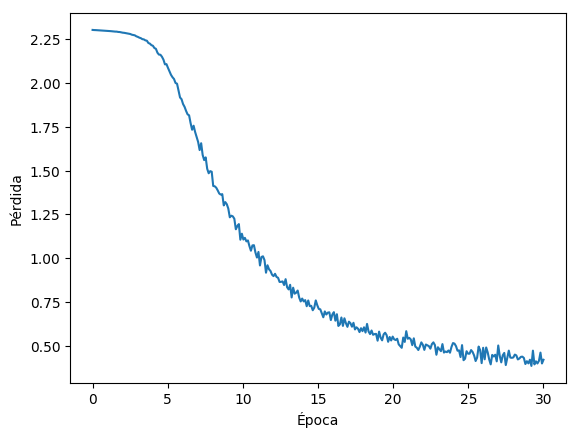


Época: 30
Precisión con los datos de entrenamiento:0.8867368421052632

Precisión con los datos de validación:0.89


PyObject <matplotlib.text.Text object at 0x7f289a3a97d0>

In [4]:
# definimos parámetros generales
C = 10
D = 784
N = size(x_ent)[1] # número de puntos de datos disponibles para entrenar

# definimos los parámetros que podemos afinar (excepto el número de capas ocultas)
H = 256
M = 10 # número de mini-montones
NM = N/M # número de datos por mini-monton
alpha = 0.1 # taza de aprendizaje
lambda = 0.0001 # fuerza de regularización
epocas = 30

# inicializamos las neuronas y sus sesgos
Wh = (rand(D,H) - 0.5)*0.01
bh = (rand(1,H) - 0.5)*0.01
Wo = (rand(H,C) - 0.5)*0.01
bo = (rand(1,C) - 0.5)*0.01

# inicializamos el arreglo para visualizar la pérdida
Js = zeros(epocas*M)

# ciclo para mostrar los datos más de una epoca
for ep = 1:epocas

    # generando indices aleatorios (es importante aleatorizar los datos en cada epoca)
    x_ind_aleat = sample(1:N, N, replace = false)

    # ciclo para iterar sobre los mini-montones de datos
    for mm = 0:M-1
       
        # accediendo los datos del mini-montón de datos actual
        mini_x = x_ent[x_ind_aleat[floor(Int,(mm*NM)+1:(mm*NM)+NM)],:]
        mini_y = y_ent[x_ind_aleat[floor(Int,(mm*NM)+1:(mm*NM)+NM)],:]

        # forward pass
        h = tanh(mini_x*Wh + bh.*ones(size(tanh(mini_x*Wh))))
        v = h*Wo + bo.*ones(size(h*Wo))
        y_hat = exp(v)./sum(exp(v),2)

        # calculando la pérdida        
        J = 0
        for n = 1:NM
            J = J + -log(y_hat[floor(Int,n),floor(Int,mini_y[floor(Int,n),:])+1])
        end        
        Js[((ep-1)*M) + mm+1,:] = J/NM + lambda*(0.5*sum(Wh.^2) + 0.5*sum(Wo.^2))
        
        # generando e_correcto
        e_correcto = zeros(size(y_hat))
        for n = 1:NM
            e_correcto[floor(Int,n),floor(Int,mini_y[floor(Int,n),:])+1] = 1
        end
        
        # backward pass
        dJ_dv = (y_hat .- e_correcto)./NM
        dJ_dWo = h'*dJ_dv + lambda*Wo
        dJ_dbo = sum(dJ_dv,1)
        
        dJ_dh = (ones(size(h)) .- tanh(h).^2).*(dJ_dv*Wo')
        dJ_dWh = mini_x'*dJ_dh + lambda*Wh
        dJ_dbh = sum((dJ_dh),1)
        
        # actualizando los parámetros
        Wo = Wo - alpha*dJ_dWo
        bo = bo - alpha*dJ_dbo
        Wh = Wh - alpha*dJ_dWh
        bh = bh - alpha*dJ_dbh      
        
    end 

    # midiendo la precisión con los datos de entrenamiento
    h = tanh(x_ent*Wh + bh.*ones(size(tanh(x_ent*Wh))))
    v = h*Wo + bo.*ones(size(h*Wo))
    y_hat = exp(v)./sum(exp(v),2)
    y_max = findmax(y_hat',1)
    y_max_ind = y_max[2] - range(0,N)'*C    
    print("------------------------------------------------------------------------------")
    print("\nÉpoca: ", ep)
    print("\nPrecisión con los datos de entrenamiento:",sum(y_max_ind .== (y_ent .+ ones(size(y_ent)))')/N, "\n")

    # midiendo la precisión con los datos de validación
    h = tanh(x_val*Wh + bh.*ones(size(tanh(x_val*Wh))))
    v = h*Wo + bo.*ones(size(h*Wo))
    y_hat = exp(v)./sum(exp(v),2)
    y_max = findmax(y_hat',1)
    y_max_ind = y_max[2] - range(0,length(y_val))'*C    
    print("Precisión con los datos de validación:",sum(y_max_ind .== (y_val .+ ones(size(y_val)))')/length(y_val), "\n")

    
end

using PyPlot
plot(linspace(0,epocas,length(Js)),Js)
xlabel("Época")
ylabel("Pérdida")

Cuando estés satisfecho con los resultados de tu red neuronal, obtén su precisión con los datos prueba.

In [117]:
# escribe tu código aquí para obtener el desempeño de tu red neuronal con los datos prueba

¡Felicidades! Has entrenado una red neuronal artificial completamente.

Inténtalo también con los datos [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html). El siguiente bloque carga una versión pequeña de la base de datos.

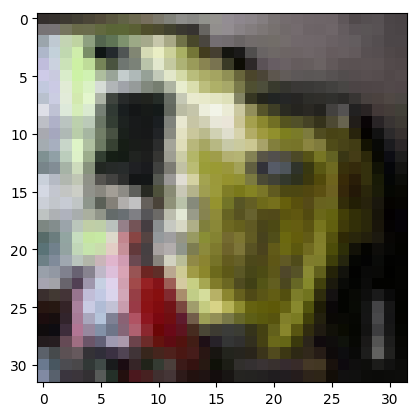

PyObject <matplotlib.image.AxesImage object at 0x7f6465a29410>

In [12]:
using MAT

# obtenemos los datos que necesitamos
mnist = matread("cifar_10.mat")
caracteristicas = mnist["imag"]
clase_de_digito = floor(Int,mnist["desc"])

# visualización de un ejemplo al azar
ind_aleat = sample(1:size(caracteristicas)[1],1)
using PyPlot
imshow(reshape(caracteristicas[ind_aleat,:],32,32,3))

# Parte 4: Redes Neuronales Artificiales con Tensorflow #

Los cuadernos que explican como implementar redes neuronales artificiales con Tensorflow están aquí:

1. [Redes Neuronales Artificiales con Tensorflow (Parte 1)](https://github.com/iranroman/algoritmica_ejercicios/blob/master/Tensorflow_pt1.ipynb)
2. [Redes Neuronales Artificiales con Tensorflow (Parte 2)](https://github.com/iranroman/algoritmica_ejercicios/blob/master/Tensorflow_pt2.ipynb)